In [1]:
import requests
import bs4
import time
import random

In [2]:
my_headers={"referer": "https://www.coupang.com/np/categories/393760",
     "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36"
}

In [6]:
total_data_list=[]
for page_number in range (1,18):
    url="https://www.coupang.com/np/categories/502492?channel=plp_C2&page={}".format(page_number)
    res = requests.get(url=url, headers=my_headers)
    
    soup=bs4.BeautifulSoup(res.text)
    
    div_elements =soup.select("dd.descriptions > div.name")
    for e in div_elements:
        div_elements = e
        data_list=[]
        data_list.append(div_elements.text.strip())
        total_data_list.append(data_list)
    time.sleep(1)

In [7]:
total_data_list

[['목우촌 품격가득 흑돈 수제 2호 햄 선물세트, 1세트'],
 ['목우촌 품격가득 수제 1호 햄 선물세트, 1세트'],
 ['곰곰 납작한 떡갈비 (냉동), 1000g, 1개'],
 ['맛있는 녀석들 제주 흑돼지 두루치기 (냉동), 500g, 2개'],
 ['하림 치킨너겟 (냉동), 1200g, 1개'],
 ['곰곰 알찬 치킨너겟, 850g, 1개'],
 ['다향오리 엄선된 원료육으로 만든 훈제오리 슬라이스, 180g, 3개'],
 ['동원에프앤비 비엔나소시지, 1kg, 1개'],
 ['경복궁 칼집 LA갈비 대 (냉동), 1kg, 2개'],
 ['경복궁 시그니처 양념육 1kg x 4팩 세트 (냉동), 1세트'],
 ['곰곰 부대찌개 (냉동), 1kg, 2개'],
 ['애슐리 오리지널 통살치킨 (냉동), 1200g, 1개'],
 ['곰곰 한돈 제육 볶음, 400g, 2개'],
 ['곰곰 김치볶음밥 (냉동), 300g, 6개'],
 ['곰곰 한입 떡갈비 (냉동), 564g, 1개'],
 ['곰곰 감자전(냉동), 1kg, 1개'],
 ['맛있는 녀석들 성북동 돼지불백 (냉동), 500g, 2개'],
 ['더건강한 닭가슴살 소시지, 120g, 10개'],
 ['단밥 맛있게 매운 쭈꾸미 (냉동), 530g, 1개'],
 ['엑셀컷 토마호크 스테이크 (냉장), 500g, 1개'],
 ['오뚜기 콤비네이션 피자 (냉동), 415g, 3개'],
 ['부산미도어묵 진공 고급 모듬어묵 13종 더블팩, 1kg, 1개'],
 ['엑셀컷 토마호크 스테이크 (냉동), 500g, 1개'],
 ['외갓집 장항동 진심 순대국 (냉동), 700g, 5개'],
 ['쟌슨빌 베다위드체다 소시지 (냉동), 1.67kg, 1개'],
 ['비비고 육개장 500g 3개 + 소고기 미역국 500g 3개, 6개'],
 ['풀무원 모짜렐라 핫도그 (냉동), 80g, 9개'],
 ['외갓집 장항동 진심 열 순대국 (냉동), 700g, 5개'],
 ['신선설농탕 설렁탕 (냉동), 550g, 3개'],
 ['담

In [8]:
import pandas as pd
df=pd.DataFrame(total_data_list)

In [9]:
df.to_csv('wordtext5.txt',index=False)

In [10]:
from konlpy.tag import Twitter 
from collections import Counter

In [21]:
file = open('wordtext5.txt', 'r', encoding="UTF-8")

lists = file.readlines()

file.close()

#lists

In [22]:
twitter = Twitter() 
morphs = [] 

for sentence in lists: 
    morphs.append(twitter.pos(sentence)) 
print(morphs)

C:\Users\win10\anaconda3\envs\javaEdu\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[[('0', 'Number'), ('\n', 'Foreign')], [('"', 'Punctuation'), ('목', 'Noun'), ('우촌', 'Noun'), ('품격', 'Noun'), ('가득', 'Noun'), ('흑', 'Adverb'), ('돈', 'Noun'), ('수제', 'Noun'), ('2', 'Number'), ('호', 'Noun'), ('햄', 'Noun'), ('선물', 'Noun'), ('세트', 'Noun'), (',', 'Punctuation'), ('1', 'Number'), ('세트', 'Noun'), ('"', 'Punctuation'), ('\n', 'Foreign')], [('"', 'Punctuation'), ('목', 'Noun'), ('우촌', 'Noun'), ('품격', 'Noun'), ('가득', 'Noun'), ('수제', 'Noun'), ('1', 'Number'), ('호', 'Noun'), ('햄', 'Noun'), ('선물', 'Noun'), ('세트', 'Noun'), (',', 'Punctuation'), ('1', 'Number'), ('세트', 'Noun'), ('"', 'Punctuation'), ('\n', 'Foreign')], [('"', 'Punctuation'), ('곰곰', 'Adverb'), ('납작한', 'Adjective'), ('떡갈비', 'Noun'), ('(', 'Punctuation'), ('냉동', 'Noun'), ('),', 'Punctuation'), ('1000', 'Number'), ('g', 'Alpha'), (',', 'Punctuation'), ('1', 'Number'), ('개', 'Noun'), ('"', 'Punctuation'), ('\n', 'Foreign')], [('"', 'Punctuation'), ('맛있는', 'Adjective'), ('녀석', 'Noun'), ('들', 'Suffix'), ('제주', 'Noun'), ('흑', 

In [23]:
noun_adj_adv_list=[] 
for sentence in morphs : 
    for word, tag in sentence : 
        if tag in ['Noun'] and ("입" not in word)and("세트" not in word)and("팩" not in word)and("산" not in word)and("것" not in word)and("냉동" not in word)and("개" not in word)and("냉장" not in word)and("용" not in word)and ("내" not in word)and ("나" not in word)and ("수"not in word) and("게"not in word)and("말"not in word): 
            noun_adj_adv_list.append(word) 

print(noun_adj_adv_list)

['목', '우촌', '품격', '가득', '돈', '호', '햄', '선물', '목', '우촌', '품격', '가득', '호', '햄', '선물', '떡갈비', '녀석', '제주', '돼지', '두루치기', '하림', '치킨너겟', '치킨너겟', '향', '오리', '엄선', '원료', '육', '훈제오리', '슬', '라이스', '에프', '앤비', '경복궁', '칼집', '갈비', '경복궁', '처', '양념', '육', '애슐리', '리지', '널', '통살', '치킨', '돈', '제육', '볶음', '김치볶음밥', '떡갈비', '감자전', '녀석', '성북동', '돼지', '불', '더', '닭', '가슴', '살', '소시지', '밥', '쭈꾸미', '엑셀', '컷', '토마호크', '스테이크', '오뚜기', '콤비네이션', '피자', '미도', '어묵', '진공', '고급', '듬', '어묵', '종', '더블', '엑셀', '컷', '토마호크', '스테이크', '외갓집', '장항동', '진심', '대국', '쟌슨빌', '베다', '위드', '체다', '소시지', '비비고', '소고기', '미역국', '풀무원', '모짜렐라', '핫도그', '외갓집', '장항동', '진심', '열', '대국', '신선설농탕', '설렁탕', '담뿍', '대파', '외갓집', '케이준', '통살', '더', '소스', '굽', '소스', '맛', '닭', '가슴', '살', '슬', '라이스', '화이트', '머쉬룸', '레드', '크림', '커리', '스파이', '커리', '비비고', '쉐프', '파트너', '쫄깃', '부채살', '양식', '불고기', '삼진', '어묵', '옛날', '듬', '어묵', '그릴', '드', '머쉬룸', '크림', '전자레인지', '크리스탈', '팜스', '호주', '안심', '스테이크', '쭈꾸미', '도사', '대창', '쭈꾸미', '삼진', '어묵', '간편', '꼬치', '어묵', '메', '우대', '꽃', '갈비', '담뿍

In [24]:
count = Counter(noun_adj_adv_list)

In [25]:
words = dict(count.most_common())

In [26]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import nltk 
from nltk.corpus import stopwords

In [27]:
%matplotlib inline 

import matplotlib 
from matplotlib import rc
rc('font', family='NanumBarunGothic')

In [28]:
from wordcloud import WordCloud

wordcloud = WordCloud(
    font_path = 'C:/Users/win10/workspace/font/NanumBarunGothic.ttf',    # 맥에선 한글폰트 설정 잘해야함.
    background_color='white',                             # 배경 색깔 정하기
    colormap = 'Accent_r',                                # 폰트 색깔 정하기
    width = 800,
    height = 800
)

wordcloud_words = wordcloud.generate_from_frequencies(words)

<class 'numpy.ndarray'>
(800, 800, 3)


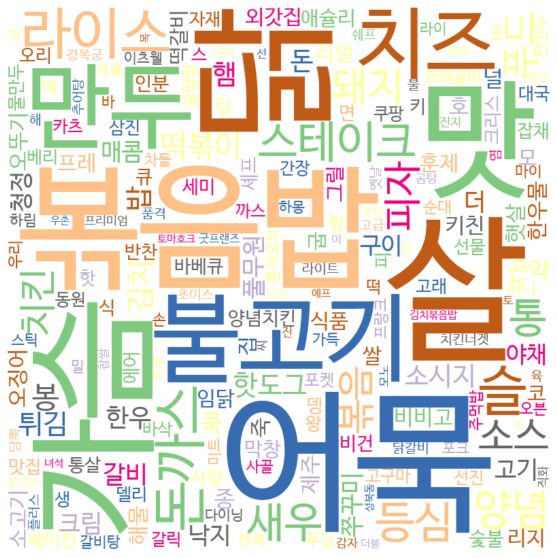

In [29]:
array = wordcloud.to_array()
print(type(array)) # numpy.ndarray
print(array.shape) # (800, 800, 3)

fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('business_anlytics_worldcloud.png')